<a href="https://colab.research.google.com/github/juancapeto/prueba/blob/main/Modulo_Salud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes**

**Problema de negocio:** La Aseguradora Medellín ha identificado que durante el ultimo año, los pacientes con la enfermedad de diabetes ha estado aumentando, lo cual preocupa a la alta gerencia ya que se  ven afectadas las finanzas de la aseguradora debido al aumento en los  gastos medicos incurridos en el  tratamiento de la enfermedad.

**Problema analítico:** Crear un modelo predictivo que permita predecir que personas presentan diabetes y no diabetes, con el objetivo de prestar atención prioritaria y no dejar avanzar la enfermedad.

**Diseño de la solución:**

1. En cada cita médica se actualiza el registro médico de cada persona, lo cual quedará en la base de datos.

2. Con la base de datos actualizada, se realiza una predicción de los usuarios que podrían tener diabetes y no diabetes.

3. Ésta informacion pasa a los profesionales de la salud para proceder a realizar el seguimiento y prestar atencion prioritaria para no dejar avanzar la enfermedad.

4. Cada mes los medicos atenderan las personas con tendencia a tener diabetes para actualizar los datos para mejorar la precisión del modelo.



In [ ]:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

In [354]:
# conexión con colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [399]:
#librerias
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import joblib 

In [356]:
df = pd.read_csv('/content/drive/MyDrive/Analítica/Analítica III/Aplicaciones en Salud/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [357]:
df.shape  #forma df

(253680, 22)

In [358]:
df.isnull().sum() #no hay nulos

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [359]:
df.duplicated().sum() #hay duplicados

23899

In [360]:
df=df.drop_duplicates() #eliminar duplicados
df.shape

(229781, 22)

In [361]:
df.dtypes #tipos de datos

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [362]:
df['Diabetes_012'] = df['Diabetes_012'].astype('category')  #convertir a categorica 

In [363]:
#ESCALAR VARIABLES NUMERICAS

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['BMI']] = scaler.fit_transform(df[['BMI']])

In [364]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [365]:
df['Diabetes_012'].value_counts()

#0 no diabetes
#1 prediabetes
#2 diabetes           se suman los preadiabeticos con diabeticos para generar una sola categoria

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

In [366]:
df=df.rename(columns={'Diabetes_012':'Diabetes'})
df['Diabetes']=df['Diabetes'].replace({2.0:1.0})    #0 No Diabetes  
df['Diabetes'].value_counts()                       #1 Diabetes

#las categorias están desbalanceadas, más adelante se balancean

0.0    190055
1.0     39726
Name: Diabetes, dtype: int64

Descripción de las variables


*   Diabetes_012: Tipo de diabetes,  0: No tiene diabetes, 1: Tiene prediabetes, 2: Tiene diabetes
*   HighBP: Hipertension arterial
*   HighChol : Colesterol
*   CholCheck: 0: No colesterol en los ultimos 5 años, de lo contrario 1
BMI: indice de masa muscular
*   Smoker: fumador
*   Stroke: accidente cerebrovascular
*   HeartDiseaseorAttack  :enfermedad coronaria o infarto del miocardio
*   PhysActivity: actividad fisica en los ultimos 30 dias
*   Fruits: consumo de 1 o más frutas por dia
*  Veggies : consumo de vegetales 1 o más veces por dia
*   HvyAlcoholConsump: consumo de mas de 10 copas de licor por semana
*  AnyHealthcare : tiene seguro
*   NoDocbcCost        : no visito el medico por alto costo
*   GenHlth  : que tan buena es su salud en escala de 1 a 5
*   MentHlth  : enfermedad mental durante los ultimos 30 dias
*   PhysHlth  : ¿durante cuántos días durante los últimos 30 días su salud física no fue buena?
*   DiffWalk: dificultad para caminar o subir escaleras
*   Sex : sexo
*   Age     : rango de edad
*   Education     :  rango de educacion
*   Income: rango ingreso mensual



# **Análisis exploratorio**

In [367]:
df['id']=np.arange(len(df)) #una columna de id para facilitar un count

In [369]:
#distribución de diabetes

# crear dataset
base = df.groupby(['Diabetes'])[['id']].count().sort_values('id', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'Diabetes', y='id',
             title= '<b>Personas con Diabetes<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Diabetes',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show()          #Categorias desbalanceadas

In [370]:
#tipo de diabetes por sexo

# crear dataset
base = df.groupby(['Sex', 'Diabetes'])[['id']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Sex', y='id', color = 'Diabetes', barmode = 'group', title= '<b>Tipo de diabetes por sexo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Sexo',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [371]:
#tipo diabetes x edad

# crear dataset
base = df.groupby(['Age', 'Diabetes'])[['id']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Age', y='id', color = 'Diabetes', barmode = 'group', title= '<b>Tipo de diabetes por rango de edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Rango Edad',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show()   #las personas con rango de edad 7: 48-53

In [372]:
#tipo diabetes x tabaquismo

# crear dataset
base = df.groupby(['Smoker', 'Diabetes'])[['id']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Smoker', y='id', color = 'Diabetes', barmode = 'group', title= '<b>Tipo de diabetes por tabaquismo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Fumador',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show() 

In [373]:
#tipo diabetes x alcoholismo

# crear dataset
base = df.groupby(['HvyAlcoholConsump', 'Diabetes'])[['id']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'HvyAlcoholConsump', y='id', color = 'Diabetes', barmode = 'group', title= '<b>Tipo de diabetes por alcoholismo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Consumo de alcohol',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show() 

In [374]:
#tipo diabetes x calidad de salud
# crear dataset
base = df.groupby(['GenHlth', 'Diabetes'])[['id']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'GenHlth', y='id', color = 'Diabetes', barmode = 'group', title= '<b>Tipo de diabetes por calidad de salud<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Consumo de alcohol',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show() 

In [375]:
#tipo diabetes x BMI

# crear dataset
base = df.groupby(['BMI', 'Diabetes'])[['id']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'BMI', y='id', color = 'Diabetes', barmode = 'group', title= '<b>Tipo de diabetes por indice de masa muscular<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'BMI',
    yaxis_title = 'Total',
    template = 'simple_white',
    title_x = 0.5)

fig.show() 

# **Selección de features**

In [376]:
df['Diabetes'] = df['Diabetes'].astype('int')

In [377]:
#ARREGLO
data=df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',     #features
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'id']]
#target
target=df['Diabetes']

In [ ]:
target

***Balanceo de las categorias: Se balancean las categorias de la variable target, eliminando muestras de la categoria más representada e igualandola con la otra categoria***

In [378]:
#SUBMUESTREO
#Importamos los paquetes
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#Inicialización de los métodos de submuestreo
#RUS
rus = RandomUnderSampler()  #random_state = 0
#NearMiss
nm = NearMiss()



In [379]:
#submuestreo. Elimina muestras de la clase más representada aleatoriamente
datarus, targetrus = rus.fit_resample(data,target)
Diabetesrus= targetrus.sum()
NoDiabetesrus = targetrus.shape[0]- Diabetesrus
print('Diabetes: ', Diabetesrus, ' , No Diabetes: ', NoDiabetesrus )
datarus

Diabetes:  39726  , No Diabetes:  39726


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,id
0,1.0,1.0,1.0,0.279070,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,7.0,30.0,1.0,0.0,9.0,5.0,2.0,174641
1,0.0,1.0,1.0,0.093023,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0,10929
2,1.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,5.0,1.0,0.0,0.0,7.0,6.0,8.0,66590
3,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,8.0,181692
4,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0,203310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79447,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0,229767
79448,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,229769
79449,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,229771
79450,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,229777


In [380]:
df=pd.concat([datarus,targetrus],axis=1,sort=False)  #concateno las features con la target
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,id,Diabetes
0,1.0,1.0,1.0,0.279070,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,7.0,30.0,1.0,0.0,9.0,5.0,2.0,174641,0
1,0.0,1.0,1.0,0.093023,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0,10929,0
2,1.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,5.0,1.0,0.0,0.0,7.0,6.0,8.0,66590,0
3,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,7.0,5.0,8.0,181692,0
4,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0,203310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79447,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0,229767,1
79448,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,229769,1
79449,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,229771,1
79450,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,229777,1


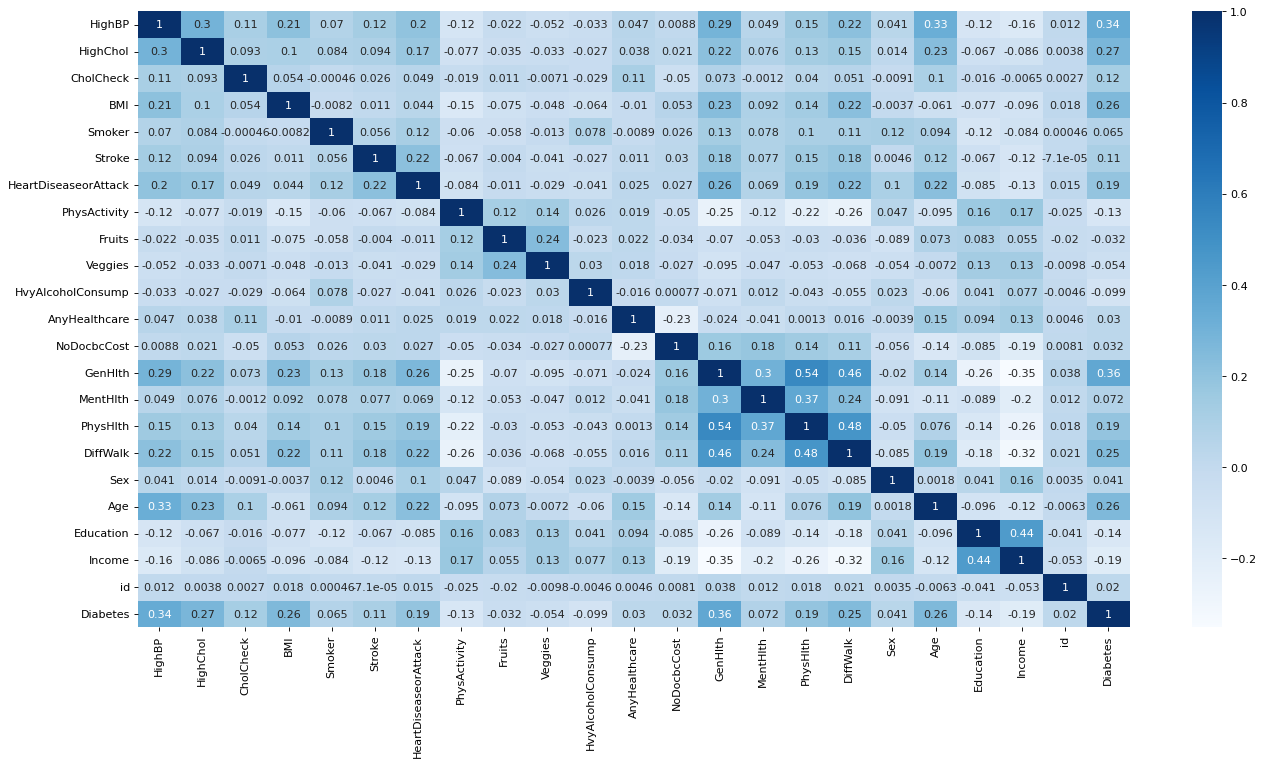

In [381]:
        #CORRELACION 
df['Diabetes'] = df['Diabetes'].astype('int')
import seaborn as sns
from matplotlib import colorbar
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80);
sns.heatmap(df.corr(), annot = True, cmap='Blues'); 


#genhlt #bmi  #age  #heartdis #difwalk  #sex

In [382]:
 #ARREGLO 

arre = df.values
X = arre[:,0:21] #variables
y = arre[:,22] #target

In [383]:
      #METODOS DE SELECCION DE VARIABLES

#LIBRERIAS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# METODO SELECTKBEST
y=y.astype('int')

prueba = SelectKBest(score_func=f_classif, k=10)
fit = prueba.fit(X,y)
#print('Features Seleccionados Kbest: ',fit.scores_)
print("Selection Kbest: ", np.where(prueba.get_support()))

# METODO RECURSIVE FEATURE ELIMINATION (RFE)

modelo = LogisticRegression(solver='liblinear')
rfe = RFE(modelo, n_features_to_select=12)
fit = rfe.fit(X,y)


print('Features Seleccionados RECURSIVE FEATURE: ', fit.support_)


# METODO FEATURE IMPORTANCE(FI)

modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)
print('Features Seleccionados FEATURE IMPORTANCE: ',modelo.feature_importances_*100)

Selection Kbest:  (array([ 0,  1,  3,  6, 13, 15, 16, 18, 19, 20]),)
Features Seleccionados RECURSIVE FEATURE:  [ True  True  True  True False  True  True False False False  True False
 False  True False False  True  True  True False  True]
Features Seleccionados FEATURE IMPORTANCE:  [ 7.25862401  4.2042869   0.75356617 17.1067008   2.7712414   1.03648913
  1.70863275  2.03582983  2.74705001  2.26049783  0.88474014  0.86315394
  1.42964918  8.46721034  6.29629107  7.57795829  2.91583211  2.22620002
 12.30192113  6.53541971  8.61870526]


In [ ]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'id', 'Diabetes'],
      dtype='object')

In [384]:
#dataframe con features seleccionados

df1=df[['HighBP','CholCheck','BMI','Stroke','HeartDiseaseorAttack','GenHlth','PhysHlth','Age','Diabetes']]

In [385]:
df1

,HighBP,CholCheck,BMI,Stroke,HeartDiseaseorAttack,GenHlth,PhysHlth,Age,Diabetes
0,1.0,1.0,0.279070,0.0,0.0,3.0,30.0,9.0,0
1,0.0,1.0,0.093023,1.0,0.0,3.0,0.0,11.0,0
2,1.0,1.0,0.174419,0.0,0.0,2.0,1.0,7.0,0
3,1.0,1.0,0.197674,0.0,0.0,1.0,0.0,7.0,0
4,1.0,1.0,0.197674,0.0,0.0,1.0,0.0,7.0,0
...,...,...,...,...,...,...,...,...,...
79447,1.0,1.0,0.127907,0.0,0.0,3.0,15.0,6.0,1
79448,0.0,1.0,0.197674,0.0,1.0,2.0,0.0,10.0,1
79449,1.0,1.0,0.151163,0.0,1.0,5.0,0.0,13.0,1
79450,1.0,1.0,0.069767,0.0,0.0,4.0,0.0,11.0,1


In [344]:
df1.columns

Index(['HighBP', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
       'GenHlth', 'PhysHlth', 'Age', 'Diabetes'],
      dtype='object')

In [386]:
 #ARREGLO 

arre = df1.values
X = arre[:,0:8] #variables
y = arre[:,8] #target

# **Redes Neuronales**

In [387]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [388]:
    # Arquitectura de la red neuronal e instanciar el modelo 

import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train.shape[1:]), #capa entrada
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),   #agrego varias capas por que son artos registros
        tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #capa salida
])

In [389]:
##### configura el optimizador y la función para optimizar ##############

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])
                                    #funcion de perdida               metrica

In [390]:
#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
import numpy as np

X_train = np.asarray(X_train).astype(np.float32) #para corregir arreglo y poder ejecutar codigo siguiente
y_train = np.asarray(y_train).astype(np.float32)

model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
557/557 [==============================] - 7s 6ms/step - loss: 0.5906 - accuracy: 0.6881 - auc: 0.7508 - recall: 0.7516 - precision: 0.6643 - val_loss: 0.5671 - val_accuracy: 0.7058 - val_auc: 0.7761 - val_recall: 0.8068 - val_precision: 0.6766
Epoch 2/10
557/557 [==============================] - 2s 4ms/step - loss: 0.5631 - accuracy: 0.7079 - auc: 0.7770 - recall: 0.7632 - precision: 0.6847 - val_loss: 0.5567 - val_accuracy: 0.7102 - val_auc: 0.7829 - val_recall: 0.7917 - val_precision: 0.6863
Epoch 3/10
557/557 [==============================] - 2s 4ms/step - loss: 0.5554 - accuracy: 0.7131 - auc: 0.7844 - recall: 0.7676 - precision: 0.6896 - val_loss: 0.5508 - val_accuracy: 0.7183 - val_auc: 0.7898 - val_recall: 0.7989 - val_precision: 0.6935
Epoch 4/10
557/557 [==============================] - 2s 4ms/step - loss: 0.5522 - accuracy: 0.7172 - auc: 0.7877 - recall: 0.7706 - precision: 0.6937 - val_loss: 0.5526 - val_accuracy: 0.7162 - val_auc: 0.7913 - val_recall: 0.8332 

La funcio de perdida loss, el accuracy, auc, recall y la precisión, mejoraron en cada paso ejecutado en entrenamiento.

En la evaluación sucedió algo igual, pero menos en la metrica recall, la cual se fue disminuyendo en cada ejecución. 

In [391]:
#########Evaluar el modelo ####################
X_test = np.asarray(X_test).astype(np.float32)  #corregir error para poder ejecutar lo siguiente
y_test = np.asarray(y_test).astype(np.float32)

test_loss, test_acc, test_auc, test_recall, test_precision = model.evaluate(X_test, y_test, verbose=2)
print("Test auc:", test_auc)

745/745 - 1s - loss: 0.5484 - accuracy: 0.7184 - auc: 0.7903 - recall: 0.7742 - precision: 0.7022 - 1s/epoch - 2ms/step
Test auc: 0.7903236746788025


745/745 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70     11722
         1.0       0.70      0.77      0.74     12114

    accuracy                           0.72     23836
   macro avg       0.72      0.72      0.72     23836
weighted avg       0.72      0.72      0.72     23836



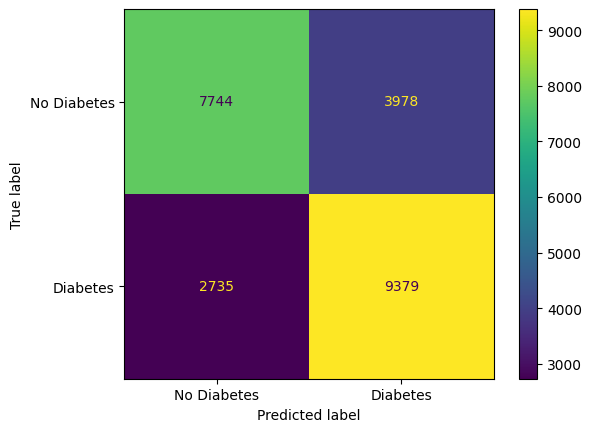

In [392]:
from sklearn import metrics ### para analizar modelo
###### matriz de confusión test 
pred_test=(model.predict(X_test) > 0.50).astype('int')

cm=metrics.confusion_matrix(y_test,pred_test, labels=[0,1])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['No Diabetes', 'Diabetes'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))

El modelo está prediciendo acertadamente 9379 personas con diabetes, mientras que comete el error de clasificar 2735 personas con diabetes cuando realmente no la tienen.

# **Afinación de hiperparametros**

In [ ]:
####instalar paquete !pip install keras-tuner
!pip install keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    
    dropout_rate=hp.Float('DO', min_value=0.1, max_value= 0.4, step=0.05)
    reg_strength = hp.Float("rs", min_value=0.0001, max_value=0.0005, step=0.0001)
    ####hp.Int
    ####hp.Choice
    

    model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
   
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
   
    model.compile(
        optimizer=opt, loss="binary_crossentropy", metrics=["AUC"],
    )
    return model


In [ ]:
hp = kt.HyperParameters()
build_model(hp)

tuner = kt.RandomSearch(
    hypermodel=build_model,
    hyperparameters=hp,
    tune_new_entries=False, ## solo evalúe los hiperparámetros configurados
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld", 
)

tuner.search(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=100)

fc_best_model = tuner.get_best_models(num_models=1)[0]
tuner.results_summary()

Trial 10 Complete [00h 00m 22s]
val_auc: 0.7666681408882141

Best val_auc So Far: 0.7859984040260315
Total elapsed time: 00h 02m 10s
Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_auc", direction="max")

Trial 00 summary
Hyperparameters:
DO: 0.2
rs: 0.0001
optimizer: adam
Score: 0.7859984040260315

Trial 07 summary
Hyperparameters:
DO: 0.35
rs: 0.0002
optimizer: adam
Score: 0.7792407870292664

Trial 09 summary
Hyperparameters:
DO: 0.30000000000000004
rs: 0.0002
optimizer: sgd
Score: 0.7666681408882141

Trial 06 summary
Hyperparameters:
DO: 0.1
rs: 0.00030000000000000003
optimizer: sgd
Score: 0.7497286796569824

Trial 02 summary
Hyperparameters:
DO: 0.2
rs: 0.0001
optimizer: rmsprop
Score: 0.7187329530715942

Trial 08 summary
Hyperparameters:
DO: 0.2
rs: 0.0004
optimizer: rmsprop
Score: 0.7112783193588257

Trial 04 summary
Hyperparameters:
DO: 0.25
rs: 0.00030000000000000003
optimizer: rmsprop
Score: 0.7026712894439697

Trial 03 summary
Hyperpara

Trial 00 summary
Hyperparameters:
DO: 0.2
rs: 0.0001
optimizer: adam
Score: 0.7859984040260315   


El modelo con afinamiento de parametros da un auc de 0.78, mientras que sin la afinacion da 0.79, su metrica auc no mejoró.

# **Despliegue de modelo**

In [400]:
joblib.dump(model, 'fc_model.pkl')
joblib.dump(model,'cnn_model.pkl')

['cnn_model.pkl']